In [3]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
from eofs.xarray import Eof
import xcdat
from pathlib import Path

import functions.data_wrangling as dw
import annular_modes as am

In [4]:
# dir = '/home/links/ct715/data_storage/PAMIP/processed_monthly/combined_ua_epfy_divFy/1.1_pdSST-pdSIC'
# path_dir = Path(dir)
# models_dir = sorted(path_dir.iterdir())
# models = [model.name.split('_')[0] for model in models_dir]
# data_dir = '/home/links/ct715/eddy_feedback/chapter1/annular_modes/data/eofs/' 

# ds_jas = {}
# for model in models:
#     model_path = os.path.join(data_dir, f'{model}_eofs_JAS.nc')
#     ds_jas[model] = xr.open_dataset(model_path)

In [5]:
# pc1 = ds_jas[models[0]].pc1
# pc1

In [6]:
ds = xr.open_dataset('/home/links/ct715/eddy_feedback/chapter1/annular_modes/data/eofs/pamip/CanESM5_eofs_JAS.nc')
pc1 = ds.pc1
pc1

<xarray.DataArray 'pc1' (time: 300, mode: 1)> Size: 1kB
[300 values with dtype=float32]
Coordinates:
  * mode     (mode) int64 8B 0
  * time     (time) int64 2kB 0 1 2 3 4 5 6 7 ... 293 294 295 296 297 298 299

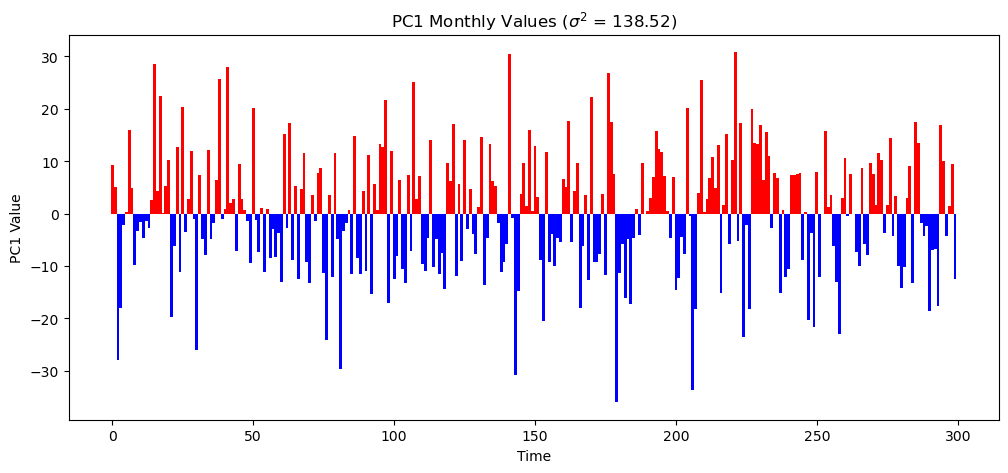

In [7]:
data = ds.pc1.sel(mode=0)
variance = np.var(data)

# Create a list of colors: red for positive (or zero) values, blue for negative values.
colors = ['red' if value >= 0 else 'blue' for value in data.values]
width = data.time[1] - data.time[0]

plt.figure(figsize=(12, 5))
# Plot the data as a bar plot using matplotlib's plt.bar
plt.bar(data.time, data, color=colors, width=width)#, edgecolor='black')

# Optionally, add labels and title
plt.xlabel('Time')
plt.ylabel('PC1 Value')
plt.title(f'PC1 Monthly Values ($\sigma^2$ = {variance.values:.2f})')
plt.show()